# YAPAY SİNİR AĞLARI DERSİ VİZE UYGULAMA SINAVI

## Neural-Network-Training02 Uygulaması

### Adı Soyadı: ENES YÜKSEL

### Numara: 194410044

### Bölüm: Bilgisayar Mühendisliği

### Sınıf: 4. Sınıf

### Tarih: 14.11.2022

Adım 1: Numpy, Sklearn ve Matplotlib kütüphaneleri tanımlanır

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Adım 2: Sinir ağında 1x3’lük vektörler, ilk eleman olarak 10 ile sınıflandırışır. Giriş ve çıkış eğitimi ve test kümeleri oluşturulur. Sonradan tanımlanacak bir tahmin işlevini test etmek için input_pred oluşturulur. Eğitim ve test verileri, altı örnekten oluşur ve denetimli öğrenme yöntemi kullanılır

In [4]:
input_train = np.array([[0, 1, 0], [0, 1, 1], [0, 0, 0], [10, 0, 0], [10, 1, 1], [10, 0, 1]])
output_train = np.array([[0], [0], [0], [1], [1], [1]])
input_pred = np.array([1, 1, 0])  
input_test = np.array([[1, 1, 1], [10, 0, 1], [0, 1, 10], [10, 1, 10], [0, 0, 0], [0, 1, 1]])
output_test = np.array([[0], [1], [0], [1], [0], [0]])

Adım 3: MinMaxScaler nesnesi oluşturulur ve ölçeklendirilmemiş verilere girdi olarak fit_transform işlevini kullanılır. İşlev, ölçeklenen ile aynı verileri döndürür

In [5]:
scaler = MinMaxScaler()
input_train_scaled = scaler.fit_transform(input_train)
output_train_scaled = scaler.fit_transform(output_train)
input_test_scaled = scaler.fit_transform(input_test)
output_test_scaled = scaler.fit_transform(output_test)

Adım 4: Girdi verilerindeki özellik sayısına eşit olması gereken girdi düğümlerinin sayısı, çıkış düğümlerinin sayısı, gizli katmandaki düğüm sayısı tanımlanır. Eğitim sırasında ayarlanacak ağımızdaki farklı düğümler arasında ağırlıklar olacaktır. error_list, ortalama mutlak hatayı içerecek şekilde tanımlanmıştır. Ardından TP, FP, TN, FN değerleri tanımlanır

In [6]:
inputSize = 3
outputSize = 1
hiddenSize = 3

W1 = np.random.rand(inputSize, hiddenSize)
W2 = np.random.rand(hiddenSize, outputSize)

error_list = []
limit = 0.5
true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

Adım 5: Eksponansiyel işlemler yapılan Sigmoid ve Sigmoid Prime fonksiyonları oluşturulur

In [7]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def sigmoidPrime(s):
    return s * (1 - s)

Adım 6: Çıktıyı tahmin etmek için sinir ağının farklı katmanları arasında ileriye doğru yineleme yapan İleri Yayma fonksiyonu tanımlanır

In [8]:
def forward(X):
    global z,z2,z3
    z = np.matmul(X, W1)
    z2 = sigmoid(z)
    z3 = np.matmul(z2, W2)
    o = sigmoid(z3)
    return o

Adım 7: Sinir ağındaki farklı düğümler için ağırlıkları güncelleyen Geri Yayılım fonksiyonu yazılır

In [9]:
def backward(X, y, o):
    global z2,W2,W1,o_error
    o_error = y - o
    o_delta = o_error * sigmoidPrime(o)
    z2_error = np.matmul(o_delta, np.matrix.transpose(W2))
    z2_delta = z2_error * sigmoidPrime(z2)
    W1 += np.matmul(np.matrix.transpose(X), z2_delta)
    W2 += np.matmul(np.matrix.transpose(z2), o_delta)

Adım 8: En hassas ağırlıkları elde etmek için gerekli olan ve eğitim sırasında, algoritma ileri-geri geçişte çalışacak ve böylece ağırlıkları güncelleyecek Eğitim Fonksiyonu oluşturulur.

In [10]:
def train(X, y, epochs): 
    global o_error
    for epoch in range(epochs): 
        o = forward(X)
        backward(X, y, o)
        error_list.append(np.abs(o_error).mean())

Adım 9: İleri Yayma fonksiyonu ile dönüt alınan Tahmin Fonksiyonu tanımlanır

In [11]:
def predict(x_predicted):
    return forward(x_predicted).item()

Adım 10: Makine öğrenimi algoritmalarının kalitesini değerlendiren Ortalama Mutlak Hata gelişimi çizilir

In [12]:
def view_error_development():
    plt.plot(range(len(error_list)), error_list)
    plt.title('Mean Sum Squared Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

Adım 11: TP, FN, FP, TN sayıkarının verildiği, makine öğrenmesi sınıflandırma algoritması kullanılan, doğruluk değerini hesaplayan test fonksiyonu yazılır

In [13]:
def test_evaluation(input_test, output_test):
    global true_positives, true_negatives, false_positives, false_negatives
    for i, test_element in enumerate(input_test):
        if predict(test_element) > limit and output_test[i] == 1:
           true_positives += 1
        if predict(test_element) < limit and output_test[i] == 1:
           false_negatives += 1
        if predict(test_element) > limit and output_test[i] == 0:
           false_positives += 1
        if predict(test_element) < limit and output_test[i] == 0:
           true_negatives += 1

        print('True positives: ', true_positives,
              '\nTrue negatives: ', true_negatives,
              '\nFalse positives: ', false_positives,
              '\nFalse negatives: ', false_negatives,
              '\nAccuracy: ',
              (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives))

Adım 12: Sinir ağı modelini eğiten ve değerlendiren fonksiyonlar çalıştırılır

True positives:  0 
True negatives:  1 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  1 
True negatives:  1 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  1 
True negatives:  2 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  2 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  3 
False positives:  0 
False negatives:  0 
Accuracy:  1.0
True positives:  2 
True negatives:  4 
False positives:  0 
False negatives:  0 
Accuracy:  1.0


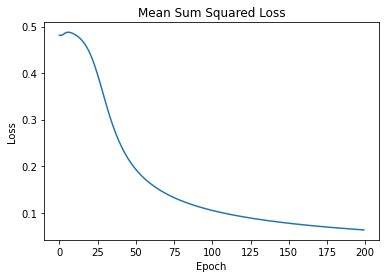

In [14]:
train(input_train_scaled, output_train_scaled, 200)
predict(input_pred)
view_error_development()
test_evaluation(input_test_scaled, output_test_scaled)

Sonuç: 
test_evaluation fonksiyonundan şu sonuçları alırız:

TP: 2 TN: 4 FP: 0 FN: 0